# NationalNames.csv Data Analysis

This notebook performs data analysis on the **NationalNames.csv** dataset to solve a variety of exercises.

**Exercises to be covered:**
1. Print the first 8 lines of the dataset
2. Print the last 8 lines of the dataset
3. Get the column names of the dataset
5. Find the number of unique names in the dataset
10. Count the number of unique names in each year
11. Find the year with the most unique names
12. Find the most popular name in the year with the most unique names
13. Find the year when the name “Jacob” of female names was the most popular
14. Find the year with the most gender-neutral names (same male and female names)
15. Find the total number of births for each year
16. Find the year when the most children were born
17. Find the number of girls and boys born each year
18. Count the number of years when there were more girls born than boys
21. Count the number of times boys have been called Barbara
22. Count the number of years of observation
23. Identify the gender-neutral names present in every year
24. Find the most popular among the “unpopular” names (never in top 100 any year)
26. Draw graphs of the distribution of the number of female John and male Mary by year

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('NationalNames.csv')

# For plots
def plot_line(x, y, label=None):
    plt.figure()
    plt.plot(x, y, label=label)
    if label:
        plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.show()

## 1. Print the first 8 lines of the dataset

In [3]:
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


## 2. Print the last 8 lines of the dataset

In [4]:
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


## 3. Get the column names of the dataset

In [5]:
df.columns.tolist()

['Id', 'Name', 'Year', 'Gender', 'Count']

## 5. Find the number of unique names in the dataset

In [6]:
df['Name'].nunique()

93889

## 10. Count the number of unique names in each year

In [7]:
unique_per_year = df.groupby('Year')['Name'].nunique()
unique_per_year

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

## 11. Find the year with the most unique names

In [8]:
year_most_unique = unique_per_year.idxmax()
year_most_unique

2008

## 12. Find the most popular name in the year with the most unique names

In [9]:
sub = df[df['Year'] == year_most_unique]
most_popular = sub.groupby('Name')['Count'].sum().idxmax()
most_popular

'Jacob'

## 13. Find the year when the name “Jacob” of female names was the most popular

In [10]:
j_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]
year_jacob_f = j_female.groupby('Year')['Count'].sum().idxmax()
year_jacob_f

2004

## 14. Find the year with the most gender-neutral names (same male and female names)

In [11]:
gender_counts = df.groupby(['Year', 'Name'])['Gender'].nunique().reset_index(name='gender_variety')
neutral = gender_counts[gender_counts['gender_variety'] == 2]
t_neutral = neutral.groupby('Year')['Name'].nunique()
year_most_neutral = t_neutral.idxmax()
year_most_neutral

2008

## 15. Find the total number of births for each year

In [12]:
total_births = df.groupby('Year')['Count'].sum()
total_births

Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64

## 16. Find the year when the most children were born

In [13]:
year_most_children = total_births.idxmax()
year_most_children

1957

## 17. Find the number of girls and boys born each year

In [14]:
gender_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
gender_year

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


## 18. Count the number of years when there were more girls born than boys

In [15]:
time_more_girls = (gender_year['F'] > gender_year['M']).sum()
time_more_girls

54

## 21. Count the number of times boys have been called Barbara

In [16]:
barbara_m = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()
barbara_m

4139

## 22. Count the number of years of observation

In [17]:
num_years = df['Year'].nunique()
num_years

135

## 23. Identify the gender-neutral names present in every year

In [18]:
total_years = df['Year'].nunique()
names_every_year = df.groupby('Name')['Year'].nunique()
neutral_all_years = names_every_year[names_every_year == total_years].index.tolist()
neutral_all_years

['Aaron',
 'Abbie',
 'Abe',
 'Abel',
 'Abigail',
 'Abner',
 'Abraham',
 'Abram',
 'Ada',
 'Adam',
 'Addie',
 'Addison',
 'Adela',
 'Adelaide',
 'Adele',
 'Adelia',
 'Adeline',
 'Adella',
 'Adrian',
 'Agatha',
 'Agnes',
 'Aimee',
 'Al',
 'Albert',
 'Alberta',
 'Alden',
 'Alex',
 'Alexander',
 'Alfred',
 'Alice',
 'Alida',
 'Aline',
 'Allan',
 'Allen',
 'Allie',
 'Alma',
 'Alonzo',
 'Aloysius',
 'Alpha',
 'Alphonse',
 'Alta',
 'Althea',
 'Alton',
 'Alva',
 'Alvin',
 'Alvina',
 'Amalia',
 'Amanda',
 'Ambrose',
 'Amelia',
 'America',
 'Amie',
 'Amos',
 'Amy',
 'Anastasia',
 'Anderson',
 'Andrew',
 'Andy',
 'Angela',
 'Angelina',
 'Angeline',
 'Angie',
 'Angus',
 'Anita',
 'Ann',
 'Anna',
 'Annabel',
 'Annabelle',
 'Anne',
 'Annetta',
 'Annette',
 'Annie',
 'Anthony',
 'Antoinette',
 'Anton',
 'Antonia',
 'Antonio',
 'Ara',
 'Archie',
 'Arnold',
 'Aron',
 'Art',
 'Arthur',
 'Asa',
 'Aubrey',
 'August',
 'Augusta',
 'Augustine',
 'Augustus',
 'Aurelia',
 'Austin',
 'Ava',
 'Avery',
 'Bailey'

## 24. Find the most popular among the “unpopular” names (never in top 100 any year)

In [22]:
top100 = df.groupby('Year').apply(lambda x: x.nlargest(100, 'Count')['Name'], include_groups=False).explode().unique()
unpopular = set(df['Name']) - set(top100)
births_by_name = df.groupby('Name')['Count'].sum()
most_pop_unpopular = births_by_name.loc[list(unpopular)].idxmax()
most_pop_unpopular

'Leslie'

## 26. Plot distributions for female John and male Mary by year

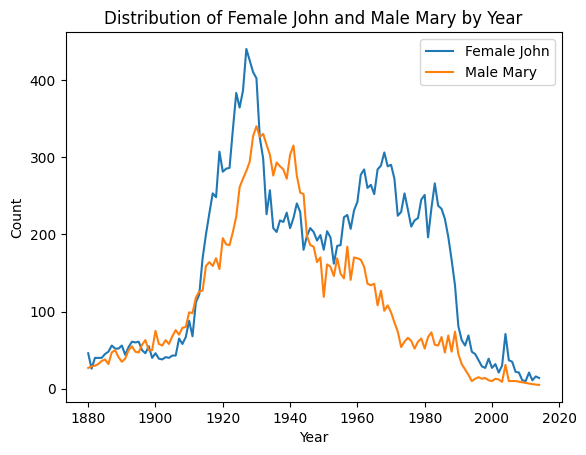

In [23]:
john_f = df[(df['Name'] == 'John') & (df['Gender'] == 'F')].groupby('Year')['Count'].sum()
mary_m = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')].groupby('Year')['Count'].sum()

plt.figure()
plt.plot(john_f.index, john_f.values, label='Female John')
plt.plot(mary_m.index, mary_m.values, label='Male Mary')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Female John and Male Mary by Year')
plt.show()